# **데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('./train_features.csv')
train_labels=pd.read_csv('./train_labels.csv')
test=pd.read_csv('./test_features.csv')

submission=pd.read_csv('./sample_submission.csv')

# **데이터 살펴보기**

In [2]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

0       600
2731    600
2722    600
675     600
1699    600
       ... 
2379    600
1354    600
2378    600
331     600
2047    600
Name: id, Length: 3125, dtype: int64

In [3]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [4]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [5]:
train.shape

(1875000, 8)

In [6]:

train['acc_t']=(train['acc_x']**2+train['acc_y']**2+train['acc_z']**2)**(1/3)
test['acc_t']=(test['acc_x']**2+test['acc_y']**2+test['acc_z']**2)**(1/3)

train['gy_t']=(train['gy_x']**2+train['gy_y']**2+train['gy_z']**2)**(1/3)
test['gy_t']=(test['gy_x']**2+test['gy_y']**2+test['gy_z']**2)**(1/3)

train['gy_acc_t']=((train['gy_x']-train['acc_x'])**2+(train['gy_y']-train['acc_y'])**2+(train['gy_z']-train['acc_z'])**2)**(1/3)
test['gy_acc_t']=((test['gy_x']-test['acc_x'])**2+(test['gy_y']-test['acc_y'])**2+(test['gy_z']-test['acc_z'])**2)**(1/3)

In [7]:
feature_acc = ['acc_x', 'acc_y', 'acc_z', 'acc_t','gy_acc_t']
feature_gy = ['gy_x', 'gy_y', 'gy_z', 'gy_t']

train['acc_sum'] = train[feature_acc].sum(axis=1)
train['acc_mean'] = train[feature_acc].mean(axis=1)
train['acc_median'] = train[feature_acc].median(axis=1)
train['acc_min'] = train[feature_acc].min(axis=1)
train['acc_max'] = train[feature_acc].max(axis=1)
train['acc_std'] = train[feature_acc].std(axis=1)
train['acc_var'] = train[feature_acc].var(axis=1)
train['acc_skew'] = train[feature_acc].skew(axis=1)

train['gy_sum'] = train[feature_gy].sum(axis=1)
train['gy_mean'] = train[feature_gy].mean(axis=1)
train['gy_median'] = train[feature_gy].median(axis=1)
train['gy_min'] = train[feature_gy].min(axis=1)
train['gy_max'] = train[feature_gy].max(axis=1)
train['gy_std'] = train[feature_gy].std(axis=1)
train['gy_var'] = train[feature_gy].var(axis=1)
train['gy_skew'] = train[feature_gy].skew(axis=1)

test['acc_sum'] = test[feature_acc].sum(axis=1)
test['acc_mean'] = test[feature_acc].mean(axis=1)
test['acc_median'] = test[feature_acc].median(axis=1)
test['acc_min'] = test[feature_acc].min(axis=1)
test['acc_max'] = test[feature_acc].max(axis=1)
test['acc_std'] = test[feature_acc].std(axis=1)
test['acc_var'] = test[feature_acc].var(axis=1)
test['acc_skew'] = test[feature_acc].skew(axis=1)

test['gy_sum'] = test[feature_gy].sum(axis=1)
test['gy_mean'] = test[feature_gy].mean(axis=1)
test['gy_median'] = test[feature_gy].median(axis=1)
test['gy_min'] = test[feature_gy].min(axis=1)
test['gy_max'] = test[feature_gy].max(axis=1)
test['gy_std'] = test[feature_gy].std(axis=1)
test['gy_var'] = test[feature_gy].var(axis=1)
test['gy_skew'] = test[feature_gy].skew(axis=1)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
pca_array = pca.fit_transform(train.iloc[:,2:])
pca_df = pd.DataFrame(pca_array, index=train.iloc[:,2:].index,
                      columns=[f"pca{num+1}" for num in range(train.iloc[:,2:].shape[1])])
pca_df


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-2824.998309,83.517436,13.969165,18.064155,4.703413,8.074214,7.562573,4.231425,-0.929015,-2.104104,...,-0.163463,-0.004241,0.162597,0.001347,0.000108,-2.443973e-12,1.569814e-12,4.315111e-14,6.000301e-14,8.850137e-20
1,-2753.241260,85.491023,8.782688,14.422211,14.408622,2.212492,4.171459,3.346958,0.522362,-2.192372,...,-0.164563,0.001940,0.187163,0.002734,0.000011,-1.570976e-12,7.133654e-13,-1.507223e-13,1.198240e-13,3.050396e-19
2,-2676.717550,95.390433,2.502825,10.725983,15.611418,1.806056,5.003385,3.407867,1.406441,-2.156515,...,-0.168640,-0.014070,0.174175,0.002282,0.000021,2.350487e-12,2.793759e-12,-7.330004e-14,-1.361747e-14,-5.091680e-20
3,-2351.238254,102.181921,-8.480502,16.595310,22.501124,-3.392470,2.309250,3.845163,0.747138,-2.126818,...,-0.183809,0.002659,0.185939,0.001407,0.000004,2.271313e-10,3.683628e-12,1.694097e-14,7.478367e-14,2.200862e-19
4,-2197.858864,106.010305,-13.345166,17.829237,25.437430,-5.388475,1.288090,3.998156,0.640963,-2.165779,...,-0.167958,0.004376,0.185161,0.001033,0.000017,1.380791e-10,-4.566519e-11,4.131073e-13,-1.035582e-14,-1.311749e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,-63.646617,246.187109,-98.041404,11.732363,8.451601,21.478249,18.137912,4.831507,2.762893,0.626847,...,-0.178908,-0.030511,0.113375,0.000499,-0.000335,6.449036e-15,-4.412379e-15,-1.620929e-15,-6.856597e-17,3.191661e-21
1874996,-158.107934,244.651654,-96.184613,11.450483,6.561933,22.534158,19.046220,5.093155,2.610595,0.550610,...,-0.189789,-0.036383,0.114025,0.001177,-0.000362,1.538728e-14,-1.095168e-14,-1.415698e-15,-2.095149e-17,1.833591e-22
1874997,-191.689570,241.648483,-93.624553,15.154140,4.113046,23.662553,19.833800,5.618240,1.753784,0.490308,...,-0.198289,-0.043917,0.118029,0.001558,-0.000364,2.006668e-14,-3.289941e-15,-4.304007e-16,6.944567e-17,3.310797e-22
1874998,-104.138347,238.811676,-92.823193,19.210455,5.722432,22.002687,18.640665,5.679077,1.216453,0.462016,...,-0.191484,-0.040655,0.100207,0.001175,-0.000326,2.933463e-14,-6.107741e-15,-1.535436e-15,1.983432e-16,4.143565e-21


In [9]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(train.iloc[:,2:].shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.212494e+08,9.996406e-01,0.999641
pca2,2.928115e+04,2.414085e-04,0.999882
pca3,5.526669e+03,4.556463e-05,0.999928
pca4,4.294716e+03,3.540779e-05,0.999963
pca5,3.487162e+03,2.874991e-05,0.999992
pca6,5.866066e+02,4.836279e-06,0.999997
pca7,3.839705e+02,3.165645e-06,1.000000
pca8,2.522376e+01,2.079574e-07,1.000000
pca9,6.595775e+00,5.437888e-08,1.000000
pca10,1.415076e+00,1.166660e-08,1.000000


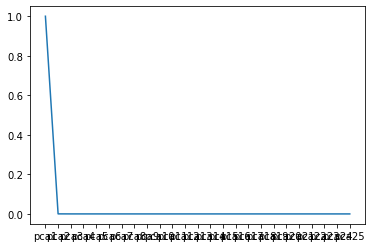

In [30]:
import matplotlib.pyplot as plt

plt.plot(result['기여율'])

In [11]:
from sklearn.decomposition import PCA
from pca import pca as p# biplot을 그리기 위한 별도 라이브러리
import seaborn as sns

pca = PCA(n_components=2)
pca_array = pca.fit_transform(train.iloc[:,2:])
pca_df = pd.DataFrame(pca_array, index=train.iloc[:,2:].index,
                      columns=['pca1','pca2'])

pca = PCA(n_components=2)
pca_array1 = pca.fit_transform(test.iloc[:,2:])
pca_df1 = pd.DataFrame(pca_array1, index=test.iloc[:,2:].index,
                      columns=['pca1','pca2'])




In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
col=pca_df.columns
scaler = StandardScaler()

pca_df= scaler.fit_transform(pca_df)
pca_df = pd.DataFrame(data = pca_df,columns =col)

pca_df1= scaler.transform(pca_df1)
pca_df1 = pd.DataFrame(data = pca_df1,columns =col)

In [ ]:
model = p(n_components=6)
results = model.fit_transform(train.iloc[:,2:])
fig, ax = model.biplot(n_feat=6, legend=False)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]


In [14]:
pca_df.shape

(1875000, 2)

In [15]:
pca_df1.shape

(469200, 2)

# **라이브러리 불러오기**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

# **데이터 수정**

In [17]:
X=tf.reshape(np.array(pca_df),[-1, 600, 2])
X.shape

TensorShape([3125, 600, 2])

In [18]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# **모델 학습 및 예측**

In [20]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(128, input_shape=(600,2)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(61, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X,y, epochs=10, batch_size=500, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 4.0826 - accuracy: 0.0848 - val_loss: 4.0327 - val_accuracy: 0.1520
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 3.9146 - accuracy: 0.2104 - val_loss: 3.4888 - val_accuracy: 0.1088
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 3.3460 - accuracy: 0.3936 - val_loss: 3.1509 - val_accuracy: 0.4976
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 3.2224 - accuracy: 0.4828 - val_loss: 3.0499 - val_accuracy: 0.4976
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 3.0717 - accuracy: 0.4828 - val_loss: 3.0105 - val_accuracy: 0.4976
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 2.9780 - accuracy: 0.4828 - val_loss: 2.8651 - val_accuracy: 0.4976
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 2.9200 - accuracy: 0.4828 - val_loss: 2.8417 - val_accuracy: 0.4976
Epoch 8/10
5/5 [========================

In [22]:
test_X=tf.reshape(np.array(pca_df1),[-1, 600, 2])
test_X.shape

TensorShape([782, 600, 2])

In [23]:
prediction=model.predict(test_X)

In [24]:
prediction.shape

(782, 61)

In [25]:
prediction

array([[0.00286583, 0.00475212, 0.00055499, ..., 0.00495199, 0.00649631,
        0.01894442],
       [0.00468945, 0.0070777 , 0.00309544, ..., 0.00403696, 0.00972039,
        0.01574525],
       [0.00465764, 0.00704916, 0.00307184, ..., 0.00400786, 0.00967392,
        0.01569826],
       ...,
       [0.00285682, 0.00474188, 0.00055201, ..., 0.00493109, 0.00646076,
        0.01891156],
       [0.00473068, 0.00710175, 0.00312523, ..., 0.00407065, 0.00978445,
        0.01581072],
       [0.0046037 , 0.00704461, 0.00303286, ..., 0.00397586, 0.00959626,
        0.01561198]], dtype=float32)

# **제출**

In [26]:
# submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# submission.iloc[:,1:]=prediction

In [28]:
# submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.002866,0.004752,0.000555,0.009665,0.011494,0.020006,0.005764,0.005838,0.011084,...,0.008980,0.000601,0.001130,0.002334,0.009322,0.035592,0.001615,0.004952,0.006496,0.018944
1,3126,0.004689,0.007078,0.003095,0.005355,0.015049,0.009493,0.009132,0.008835,0.027457,...,0.009032,0.004027,0.005614,0.008060,0.014338,0.013790,0.007102,0.004037,0.009720,0.015745
2,3127,0.004658,0.007049,0.003072,0.005325,0.015004,0.009467,0.009091,0.008800,0.027377,...,0.009002,0.004001,0.005584,0.008014,0.014307,0.013758,0.007067,0.004008,0.009674,0.015698
3,3128,0.004644,0.007039,0.003062,0.005315,0.014985,0.009464,0.009074,0.008787,0.027328,...,0.008994,0.003989,0.005570,0.007992,0.014298,0.013751,0.007051,0.003996,0.009653,0.015678
4,3129,0.002799,0.004645,0.000531,0.009402,0.011234,0.019731,0.005595,0.005692,0.010963,...,0.008800,0.000575,0.001103,0.002260,0.009036,0.035303,0.001574,0.004770,0.006308,0.018598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.003012,0.004970,0.000604,0.010164,0.012005,0.020583,0.006063,0.006100,0.011368,...,0.009334,0.000654,0.001194,0.002480,0.009834,0.036125,0.001716,0.005271,0.006842,0.019506
778,3903,0.005170,0.007527,0.003451,0.005882,0.015877,0.009933,0.009820,0.009337,0.028579,...,0.009489,0.004430,0.006012,0.008807,0.014926,0.014273,0.007610,0.004542,0.010512,0.016393
779,3904,0.002857,0.004742,0.000552,0.009621,0.011458,0.019974,0.005733,0.005817,0.011073,...,0.008960,0.000598,0.001128,0.002322,0.009288,0.035538,0.001611,0.004931,0.006461,0.018912
780,3905,0.004731,0.007102,0.003125,0.005383,0.015117,0.009485,0.009180,0.008859,0.027620,...,0.009049,0.004063,0.005650,0.008133,0.014352,0.013802,0.007154,0.004071,0.009784,0.015811


In [29]:
# submission.to_csv('baseline_submission.csv', index=False)